# Saving and Loading Models



In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

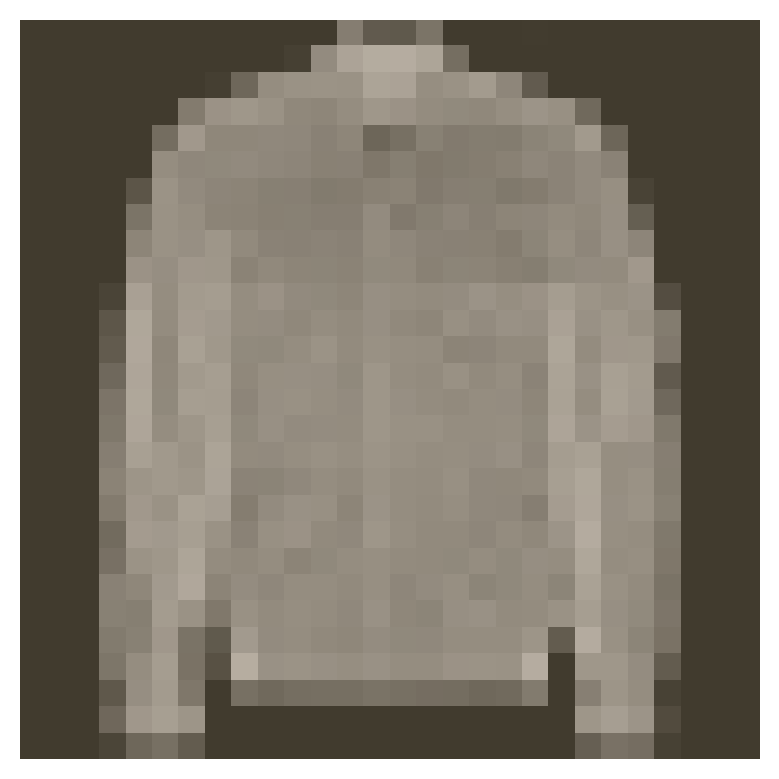

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

# Train a network



In [4]:
# Create the network, define the criterion and optimizer

model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.720..  Test Loss: 0.960..  Test Accuracy: 0.663
Epoch: 1/2..  Training Loss: 1.031..  Test Loss: 0.724..  Test Accuracy: 0.738
Epoch: 1/2..  Training Loss: 0.869..  Test Loss: 0.685..  Test Accuracy: 0.736
Epoch: 1/2..  Training Loss: 0.766..  Test Loss: 0.642..  Test Accuracy: 0.746
Epoch: 1/2..  Training Loss: 0.715..  Test Loss: 0.662..  Test Accuracy: 0.730
Epoch: 1/2..  Training Loss: 0.710..  Test Loss: 0.590..  Test Accuracy: 0.779
Epoch: 1/2..  Training Loss: 0.715..  Test Loss: 0.565..  Test Accuracy: 0.791
Epoch: 1/2..  Training Loss: 0.665..  Test Loss: 0.577..  Test Accuracy: 0.784
Epoch: 1/2..  Training Loss: 0.650..  Test Loss: 0.539..  Test Accuracy: 0.794
Epoch: 1/2..  Training Loss: 0.636..  Test Loss: 0.546..  Test Accuracy: 0.800
Epoch: 1/2..  Training Loss: 0.678..  Test Loss: 0.526..  Test Accuracy: 0.814
Epoch: 1/2..  Training Loss: 0.608..  Test Loss: 0.525..  Test Accuracy: 0.808
Epoch: 1/2..  Training Loss: 0.590..  Test Loss: 0.5

## Saving and loading networks


In [6]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [7]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [8]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [9]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [10]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

In [11]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [12]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
